## Dataset Information

Hate speech is an unfortunately common occurrence on the Internet. Often social media sites like Facebook and Twitter face the problem of identifying and censoring problematic posts while weighing the right to freedom of speech. The importance of detecting and moderating hate speech is evident from the strong connection between hate speech and actual hate crimes. Early identification of users promoting hate speech could enable outreach programs that attempt to prevent an escalation from speech to action. Sites such as Twitter and Facebook have been seeking to actively combat hate speech. In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.

### Data Files

train.csv - For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.
There is 1 test file (public)

test_tweets.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import nltk 
import string
%matplotlib inline

### Data Preprocessing 

**For training dataset**

In [2]:
df=pd.read_csv('train_twitter_sentiment.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def rem_pattern(input_text, pattern):
    txt=re.findall(pattern, input_text)
    for i in txt:
        input_text=re.sub(i, "", input_text)
    return input_text

In [6]:
df['clean_tweet']=np.vectorize(rem_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


**Tokenization**

In [9]:
tokenizing_tweet=df['clean_tweet'].apply(lambda x: x.split())

In [10]:
tokenizing_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

**Stemming**

In [11]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenizing_stemming=tokenizing_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenizing_stemming.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: clean_tweet, dtype: object

**Lemmetization**

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

tokenizing_lemmetization=tokenizing_tweet.apply(lambda sentence: [lemma.lemmatize(word) for word in sentence])
tokenizing_lemmetization.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

**Creating clean tweets with lemmetization and stemming**

In [14]:
for i in range(len(tokenizing_stemming)):
    tokenizing_stemming[i]=" ".join(tokenizing_stemming[i])
df['clean_stemming']=tokenizing_stemming
df.head()

,id,label,tweet,clean_tweet,clean_stemming
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguid societi now #motiv


In [15]:
for i in range(len(tokenizing_lemmetization)):
    tokenizing_lemmetization[i]=" ".join(tokenizing_lemmetization[i])
df['clean_lemmetization']=tokenizing_lemmetization
df.head()

,id,label,tweet,clean_tweet,clean_stemming,clean_lemmetization
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunct and is so selfish he...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thank for #lyft credit i can t use caus they d...,thanks for #lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesti,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguid societi now #motiv,factsguide society now #motivation


### Exploratory Data Analysis

In [16]:
all_lemma=" ".join([sentence for sentence in df['clean_lemmetization']])
all_stem=" ".join([sentence for sentence in df['clean_stemming']])

**Visualizing all frequent words in the tweets using 'wordcloud' library**

In [17]:
from wordcloud import WordCloud
wordcloud_stem=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_stem)
wordcloud_lemma=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_lemma)

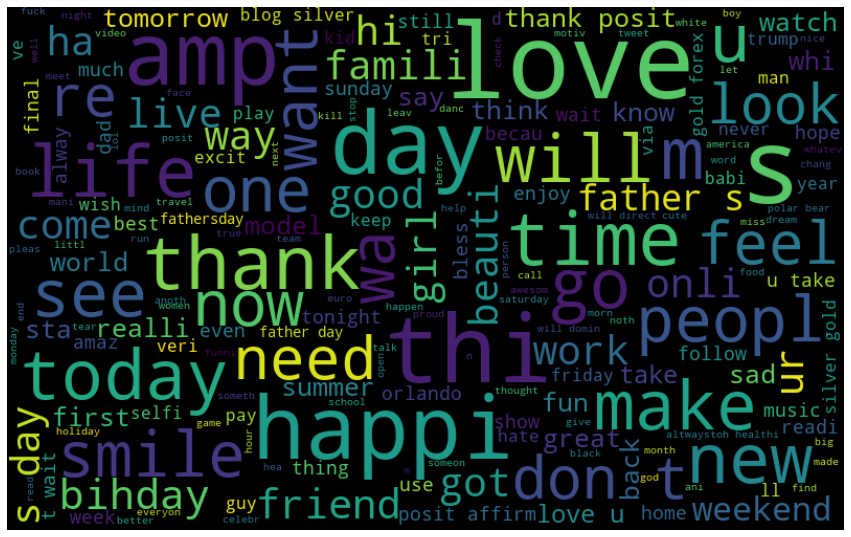

In [18]:
#Most frequent words using Stemming
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.show()

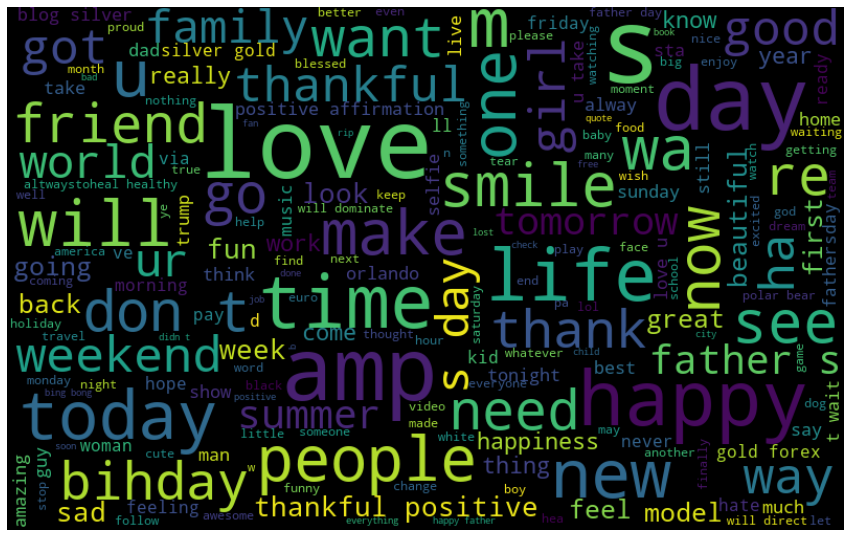

In [19]:
#Most frequent words using Lemmetization
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_lemma, interpolation='bilinear')
plt.axis('off')
plt.show()

**Most frequent positive words from the tweets**

In [20]:
all_lemma=" ".join([sentence for sentence in df['clean_lemmetization'][df['label']==0]])
all_stem=" ".join([sentence for sentence in df['clean_stemming'][df['label']==0]])
wordcloud_stem=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_stem)
wordcloud_lemma=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_lemma)

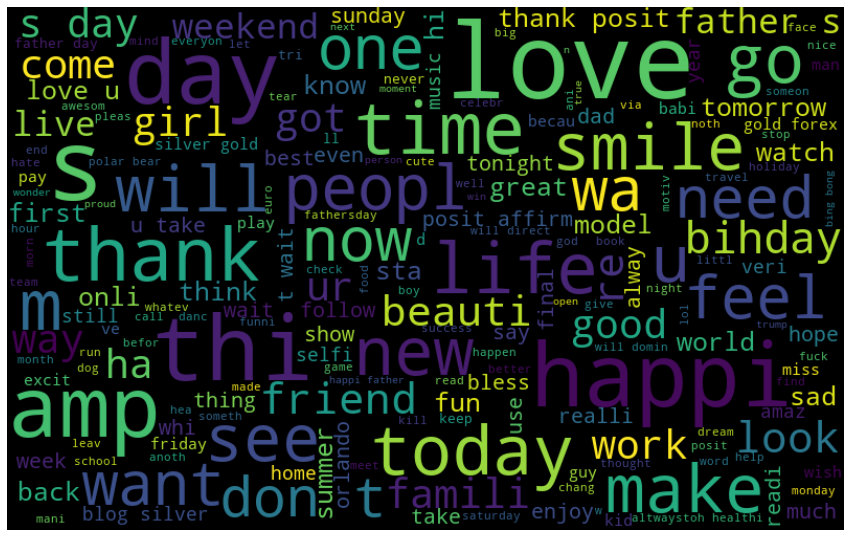

In [21]:
#Most frequent positive words using stemming 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.show()

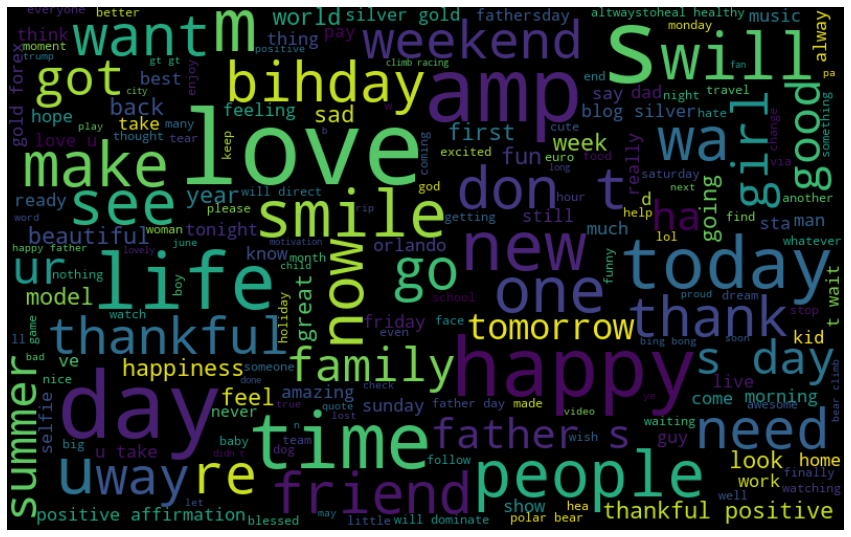

In [22]:
#Most frequent positive words using Lemmetization
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_lemma, interpolation='bilinear')
plt.axis('off')
plt.show()

**Most frequent negative words from the tweets**

In [23]:
neg_lemma=" ".join([sentence for sentence in df['clean_lemmetization'][df['label']==1]])
neg_stem=" ".join([sentence for sentence in df['clean_stemming'][df['label']==1]])
wordcloud_stem=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neg_stem)
wordcloud_lemma=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neg_lemma)

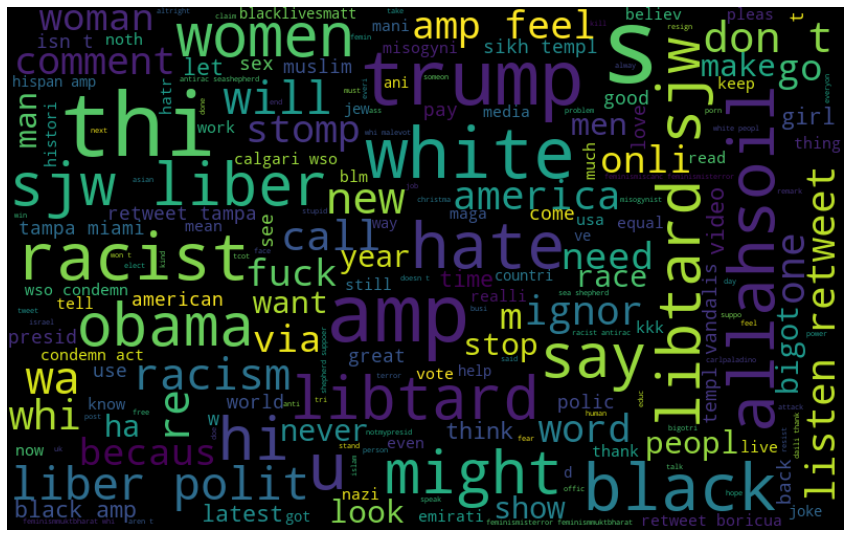

In [24]:
#Most frequent negative words using stemming
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.show()

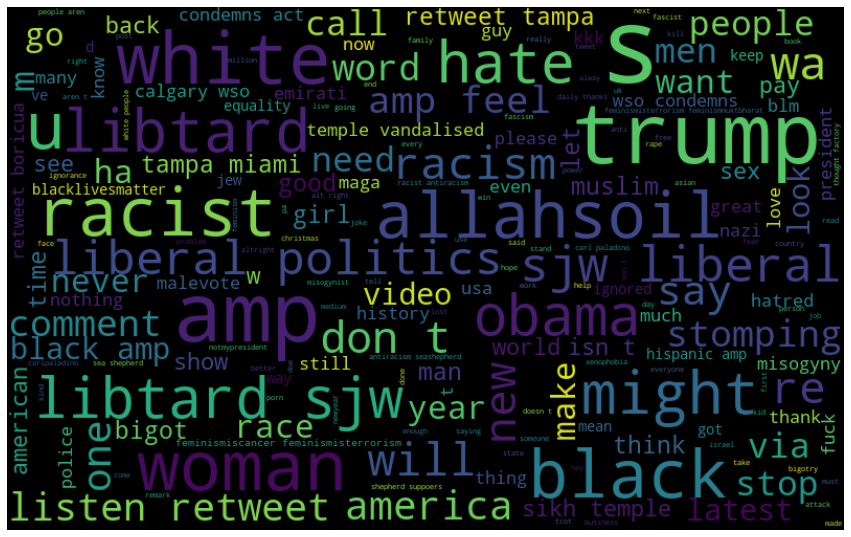

In [25]:
#Most frequent negative words using lemmetization
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_lemma, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
#Extracting Hashtags from the tweets
def extract_hashtag(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [27]:
positive_stemming_ht=extract_hashtag(df['clean_stemming'][df['label']==0])
positive_lemmetization_ht=extract_hashtag(df['clean_lemmetization'][df['label']==0])

negative_stemming_ht=extract_hashtag(df['clean_stemming'][df['label']==1])
negative_lemmetization_ht=extract_hashtag(df['clean_lemmetization'][df['label']==1])

**Creating a individual lists of positive and negative hashtags (individual lemmetization and stemming lists)**

In [28]:
positive_stemming_ht=sum(positive_stemming_ht, [])

In [29]:
positive_lemmetization_ht=sum(positive_lemmetization_ht, [])

In [30]:
negative_lemmetization_ht=sum(negative_lemmetization_ht,[])

In [31]:
negative_stemming_ht=sum(negative_stemming_ht, [])

In [32]:
positive_stemming_ht[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [33]:
positive_lemmetization_ht[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [34]:
negative_lemmetization_ht[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [35]:
negative_stemming_ht[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

**Visualizing count of top 10 Positive and top 10 Negative hashtags**

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

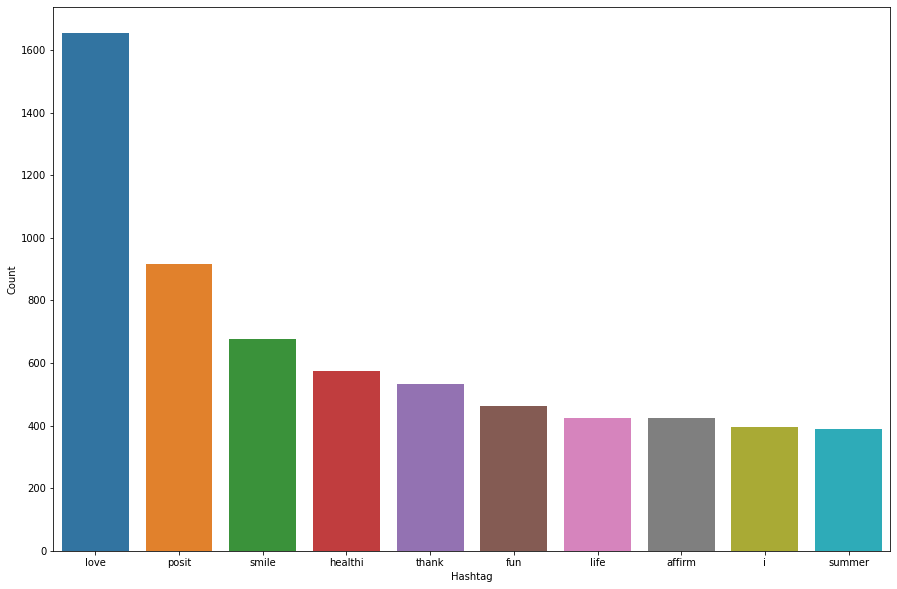

In [36]:
#Positive hashtag count using stemming
freq_pos_stemming=nltk.FreqDist(positive_stemming_ht)
pos_stem=pd.DataFrame({'Hashtag':list(freq_pos_stemming.keys()),
                      'Count':list(freq_pos_stemming.values())})
pos_stem=pos_stem.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,10))
sb.barplot(data=pos_stem, x='Hashtag', y='Count')

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

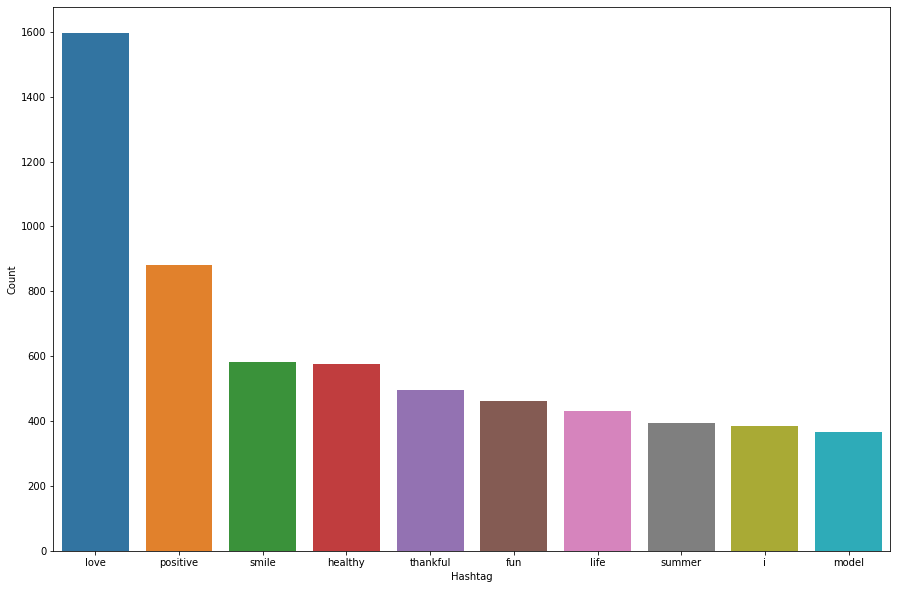

In [37]:
#Positive hashtag count using lemmetization
freq_pos_lemmetization=nltk.FreqDist(positive_lemmetization_ht)
pos_lemma=pd.DataFrame({'Hashtag':list(freq_pos_lemmetization.keys()),
                      'Count':list(freq_pos_lemmetization.values())})
pos_lemma=pos_lemma.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,10))
sb.barplot(data=pos_lemma, x='Hashtag', y='Count')

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

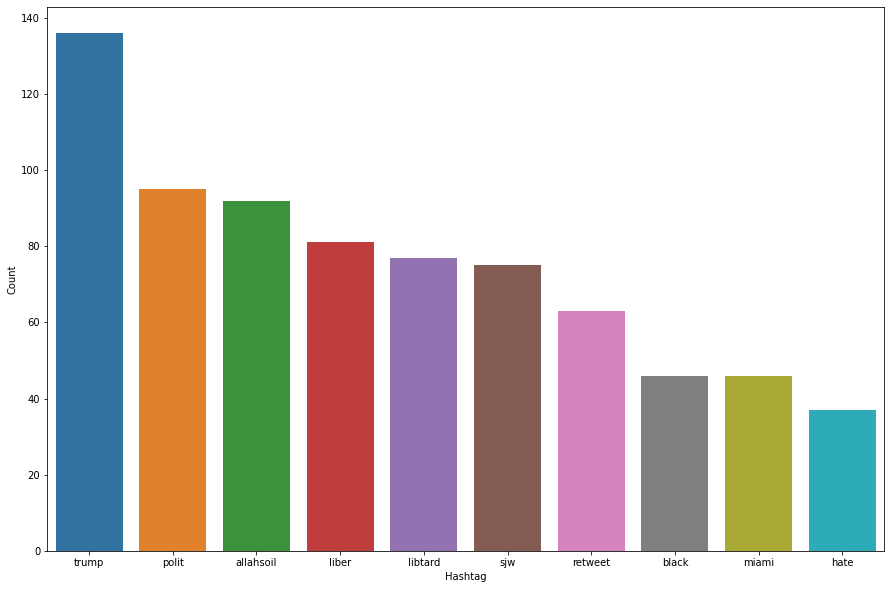

In [38]:
#Negative hashtag count using stemming
freq_neg_stemming=nltk.FreqDist(negative_stemming_ht)
neg_stem=pd.DataFrame({'Hashtag':list(freq_neg_stemming.keys()),
                      'Count':list(freq_neg_stemming.values())})
neg_stem=neg_stem.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,10))
sb.barplot(data=neg_stem, x='Hashtag', y='Count')

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

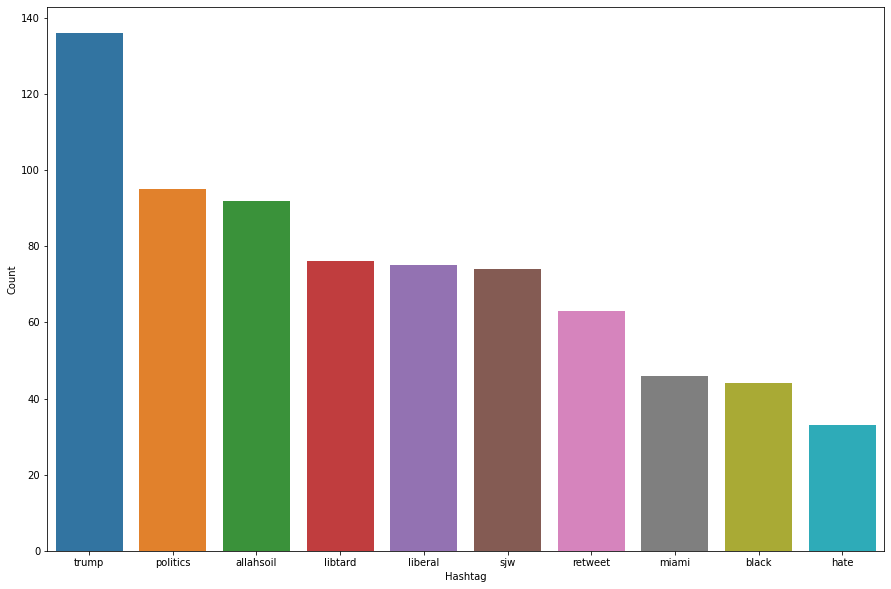

In [39]:
#Negative hastag count using lemmetization
freq_neg_lemmetization=nltk.FreqDist(negative_lemmetization_ht)
neg_lemma=pd.DataFrame({'Hashtag':list(freq_neg_lemmetization.keys()),
                      'Count':list(freq_neg_lemmetization.values())})
neg_lemma=neg_lemma.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,10))
sb.barplot(data=neg_lemma, x='Hashtag', y='Count')

### Feature Extraction

In [40]:
#Using term frequency–inverse document frequency (TF-IDF) for feature extraction. Unlike the Bag of Words method, TF-IDF can extract bigrams and unigrams.
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf=TfidfVectorizer(min_df=2,max_df=0.9, stop_words='english', ngram_range=(1,2), max_features=1000)
features_stem=tfidf.fit_transform(df['clean_stemming'])
features_lemma=tfidf.fit_transform(df['clean_lemmetization'])

In [41]:
#Splitting the dataset into Train-Test set individually, for Lemmetization and Stemming
from sklearn.model_selection import train_test_split
x_train_stem,x_test_stem,y_train_stem,y_test_stem=train_test_split(features_stem, df['label'], random_state=42, test_size=0.25)
x_train_lemma,x_test_lemma,y_train_lemma,y_test_lemma=train_test_split(features_lemma, df['label'], random_state=42, test_size=0.25)

### Model Training

Logistic Regression and Random Forest were used here, as the problem statement is based on binary classification 
(0: Positive Tweets, 1:Negative Tweets)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report

In [43]:
lr_stem_model=LogisticRegression()
lr_lemma_model=LogisticRegression()
rf_stem_model=RandomForestClassifier()
rf_lemma_model=RandomForestClassifier()

#### Logistic Regression

**Stemming**

In [44]:
#Training the stemming train set using Logistic Regression 
lr_stem_model.fit(x_train_stem, y_train_stem)

LogisticRegression()

In [45]:
#Testing the stemming train set using Logistic Regression
lr_stem_pred=lr_stem_model.predict(x_test_stem)

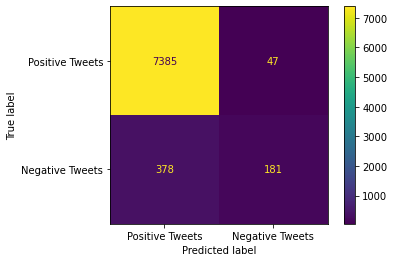

In [46]:
#Confusion Matrix for Logistic Regression (Stemming)
plot_confusion_matrix(
    lr_stem_model,
    x_test_stem,
    y_test_stem,
    values_format='d',
    display_labels=['Positive Tweets', 'Negative Tweets']
)

In [47]:
print(classification_report(y_test_stem, lr_stem_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.79      0.32      0.46       559

    accuracy                           0.95      7991
   macro avg       0.87      0.66      0.72      7991
weighted avg       0.94      0.95      0.94      7991



**Lemmetization**

In [48]:
#Training the lemmetization train set using Logistic Regression 
lr_lemma_model.fit(x_train_lemma, y_train_lemma)

LogisticRegression()

In [49]:
#Testing the stemming train set using Logistic Regression
lr_lemma_pred=lr_lemma_model.predict(x_test_lemma)

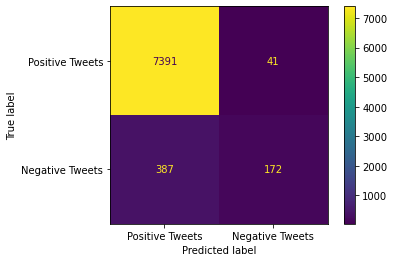

In [50]:
#Confusion Matrix for Logistic Regression (Lemmetization)
plot_confusion_matrix(
    lr_lemma_model,
    x_test_lemma,
    y_test_lemma,
    values_format='d',
    display_labels=['Positive Tweets', 'Negative Tweets']
)

In [51]:
print(classification_report(y_test_lemma, lr_lemma_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.81      0.31      0.45       559

    accuracy                           0.95      7991
   macro avg       0.88      0.65      0.71      7991
weighted avg       0.94      0.95      0.94      7991



#### Random Forest

**Stemming**

In [52]:
#Training the stemming train set using Random Forest
rf_stem_model.fit(x_train_stem, y_train_stem)

RandomForestClassifier()

In [53]:
#Testing the stemming train set using Random Forest
rf_stem_pred=rf_stem_model.predict(x_test_stem)

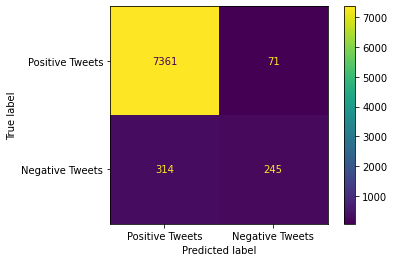

In [54]:
#Confusion Matrix for Random Forest (Stemming)
plot_confusion_matrix(
    rf_stem_model,
    x_test_stem,
    y_test_stem,
    values_format='d',
    display_labels=['Positive Tweets', 'Negative Tweets']
)

In [55]:
print(classification_report(y_test_stem, rf_stem_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.78      0.44      0.56       559

    accuracy                           0.95      7991
   macro avg       0.87      0.71      0.77      7991
weighted avg       0.95      0.95      0.95      7991



**Lemmetization**

In [56]:
#Training the lemmetization train set using Random Forest
rf_lemma_model.fit(x_train_lemma, y_train_lemma)

RandomForestClassifier()

In [57]:
#Testing the lemmetization test set using Random Forest
rf_lemma_pred=rf_lemma_model.predict(x_test_lemma)

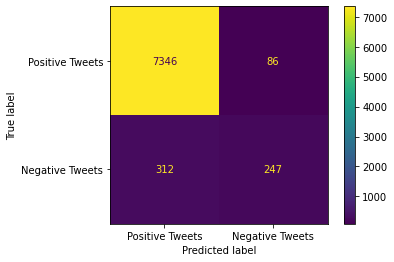

In [58]:
#Confusion Matrix for Random Forest (Lemmetization)
plot_confusion_matrix(
    rf_lemma_model,
    x_test_lemma,
    y_test_lemma,
    values_format='d',
    display_labels=['Positive Tweets', 'Negative Tweets']
)

In [59]:
print(classification_report(y_test_lemma, rf_lemma_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.74      0.44      0.55       559

    accuracy                           0.95      7991
   macro avg       0.85      0.72      0.76      7991
weighted avg       0.94      0.95      0.94      7991



### Using model on Test File

In [60]:
df_test=pd.read_csv('test_tweets.csv')

In [61]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [62]:
def rem_pattern(input_text, pattern):
    text=re.findall(pattern, input_text)
    for word in text:
        input_text=re.sub(word, "", input_text)
    return input_text
df_test['clean_tweets']=np.vectorize(rem_pattern)(df_test['tweet'], "@[\w]*")

In [64]:
df_test['clean_tweets']=df_test['clean_tweets'].str.replace("[^a-zA-Z#]"," ")

In [65]:
tokenized_tweet=df_test['clean_tweets'].apply(lambda x: x.split())

In [66]:
tokenized_lemmetization=tokenized_tweet.apply(lambda sentence: [lemma.lemmatize(word) for word in sentence])
tokenized_lemmetization.head()

0    [#studiolife, #aislife, #requires, #passion, #...
1    [#white, #supremacists, want, everyone, to, se...
2    [safe, way, to, heal, your, #acne, #altwaystoh...
3    [is, the, hp, and, the, cursed, child, book, u...
4    [rd, #bihday, to, my, amazing, hilarious, #nep...
Name: clean_tweets, dtype: object

In [67]:
for i in range(len(tokenized_lemmetization)):
    tokenized_lemmetization[i]=" ".join(tokenized_lemmetization[i])
df_test['clean_tweets']=tokenized_lemmetization

In [74]:
#Using term frequency–inverse document frequency (TF-IDF) for feature extraction. Unlike the Bag of Words method, TF-IDF can extract bigrams and unigrams.
tfidf=TfidfVectorizer(min_df=2,max_df=0.9, stop_words='english', ngram_range=(1,2), max_features=2000)
features=tfidf.fit_transform(df_test['clean_tweets'])

In [75]:
test_predict=rf_lemma_model.predict(features)

ValueError: Number of features of the model must match the input. Model n_features is 1000 and input n_features is 2000 

In [70]:
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
df_test['label']=test_predict

In [72]:
df_test.head()

,id,tweet,clean_tweets,label
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see the ...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way to heal your #acne #altwaystoheal #he...,0
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amazing hilarious #nephew eli...,0


In [73]:
print(df_test.loc[(df_test['label']==1)])

          id                                              tweet  \
29     31992  @user @user tried that! but nothing - will try...   
70     32033  lipo-light helped shape her, and it can help s...   
79     32042     greatbritain: all eyes on the skies as rafr...   
106    32069  l o v e   #sky #photoofday #moments #cool #ins...   
124    32087  this how we turning up todayðð½ððð...   
...      ...                                                ...   
17023  48986  a father is neither an anchor to hold us back,...   
17028  48991   @user not today, hilltroll. #feelthebern  #ne...   
17052  49015  #greens   bull hill climb: you have to reach t...   
17077  49040  saying goodbye to the trap house tomorrow   #t...   
17112  49075  @user wish you get lots of  success &amp; happ...   

                                            clean_tweets  label  
29     tried that but nothing will try again know you...      1  
70     lipo light helped shape her and it can help sh...      1